# Regression Task Project1
1. Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results.
2. Then use cross-validation to find average training and testing score.
3. Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear).
4. Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

# 1. Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv("ToyotaCorolla_kaggle.csv")

In [31]:
print("train data size is", data.shape)

train data size is (1436, 37)


In [32]:
data.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0


# 2. EDA
0) Interpret variables one by one and establish hypotheses about the relationship with dependent variables

1) Search the acquired data and check and classify the data type for each variable (Numerical or Text, Ordered or Unordered, Continuous or Discrete / Categorical ... etc)

2) Pre-processing after checking outliers such as no NaN value and no empty data

3) Exploring the relationship between variables (using Scatter Plot, Box Plot, Heat Map, etc.)

In [33]:
data.drop(['Id','Model'], axis=1, inplace=True)

In [34]:
data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,NaN,1,0,2000.0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,NaN,1,0,2000.0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90.0,1,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90.0,0,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90.0,0,0,2000.0,...,1,1,1,0,1,0,1,0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 35 columns):
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1366 non-null float64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1385 non-null float64
Doors               1424 non-null float64
Cylinders           1398 non-null float64
Gears               1418 non-null float64
Quarterly_Tax       1436 non-null int64
Weight              1431 non-null float64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco               1436 non-null int64


In [36]:
# there are missing values in the dataset too
data.isnull().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                  70
Met_Color            0
Automatic            0
cc                  51
Doors               12
Cylinders           38
Gears               18
Quarterly_Tax        0
Weight               5
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Tow_Bar              0
dtype: int64

### 1. Fuel_Type

In [37]:
# we can create dummy variable for Fuel_Type
data['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

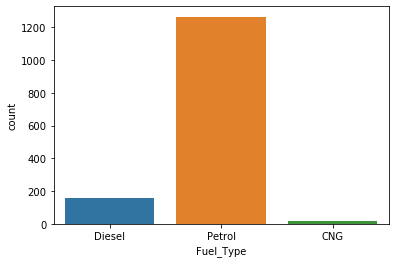

In [38]:
sns.countplot(data['Fuel_Type'])

### 2. Price

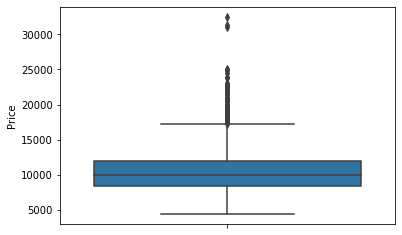

In [39]:
sns.boxplot(data['Price'],orient='v')

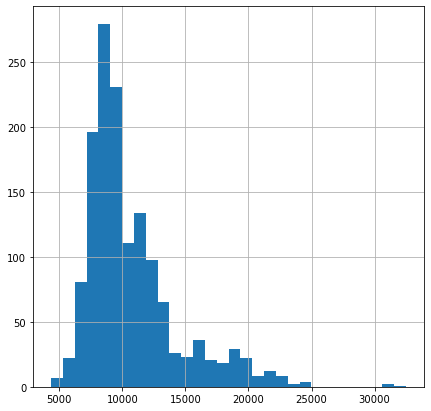

In [40]:
# data is left skewed
data['Price'].hist(bins=30, figsize=(7,7))
plt.show()

In [41]:
data['Price'].mean()

10730.824512534818

In [42]:
data[data['Price']>17500]['Price'].count()

105

### 3. Age_08_04

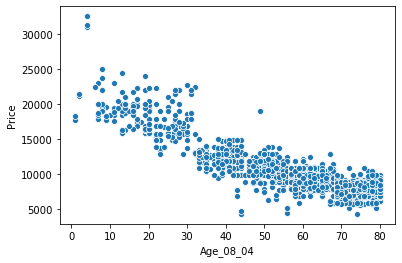

In [43]:
# as the age increases price of the car decreases 
sns.scatterplot(data['Age_08_04'], data['Price'])

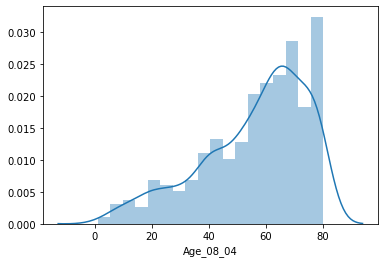

In [44]:
sns.distplot(data['Age_08_04'])

### 4.Mfg_Month

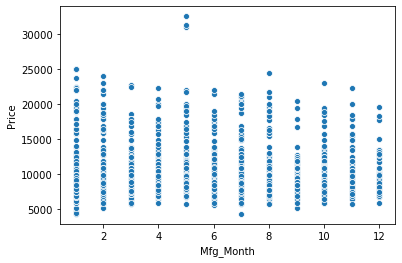

In [45]:
#there is no such relationship between Mfg_Month and Price
sns.scatterplot(data['Mfg_Month'], data['Price'])

In [46]:
data.groupby("Mfg_Year").count()['Age_08_04']

Mfg_Year
1998    392
1999    441
2000    225
2001    192
2002     87
2003     75
2004     24
Name: Age_08_04, dtype: int64

In [47]:
#There are 17 CNG vehicles, 106 Diesel, and 904 Petroleum vehicles, overwhelmingly.
data.groupby(['Mfg_Year', 'Fuel_Type']).count()['Age_08_04']

Mfg_Year  Fuel_Type
1998      CNG            3
          Diesel        36
          Petrol       353
1999      CNG            6
          Diesel        37
          Petrol       398
2000      CNG            3
          Diesel        28
          Petrol       194
2001      CNG            5
          Diesel        21
          Petrol       166
2002      Diesel        16
          Petrol        71
2003      Diesel         9
          Petrol        66
2004      Diesel         8
          Petrol        16
Name: Age_08_04, dtype: int64

### 5. Mfg_Year

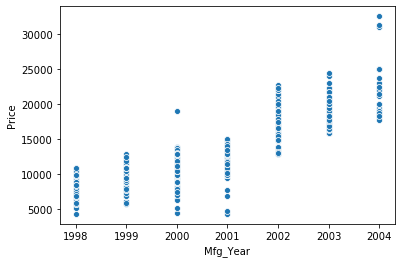

In [48]:
# as the age increases price of the car decreases 
sns.scatterplot(data['Mfg_Year'], data['Price'])

In [49]:
data.groupby(['Mfg_Year', 'Fuel_Type', 'cc','HP']).count()

Price  Age_08_04  Mfg_Month   KM  Met_Color  \
Mfg_Year Fuel_Type cc     HP                                                   
1998     CNG       1600.0 110.0      1          1          1    1          1   
         Diesel    2000.0 72.0      23         23         23   23         23   
                          73.0       1          1          1    1          1   
                          90.0       2          2          2    2          2   
         Petrol    1300.0 86.0     103        103        103  103        103   
...                                ...        ...        ...  ...        ...   
2004     Diesel    2000.0 90.0       1          1          1    1          1   
                          116.0      4          4          4    4          4   
         Petrol    1400.0 97.0       4          4          4    4          4   
                          98.0       1          1          1    1          1   
                   1600.0 110.0     11         11         11   11         11   

                                 Automatic  Doors  Cylinders  Gears  \
Mfg_Year Fuel_Type cc     HP                                          
1998     CNG       1600.0 110.0          1      1          1      1   
         Diesel    2000.0 72.0          23     23         22     21   
                          73.0           1      1          1      1   
                          90.0           2      2          2      2   
         Petrol    1300.0 86.0         103    103        100    103   
...                                    ...    ...        ...    ...   
2004     Diesel    2000.0 90.0           1      1          1      1   
                          116.0          4      4          4      4   
         Petrol    1400.0 97.0           4      4          4      4   
                          98.0           1      1          1      1   
                   1600.0 110.0         11     11         11     11   

                                 Quarterly_Tax  ...  Central_Lock  \
Mfg_Year Fuel_Type cc     HP                    ...                 
1998     CNG       1600.0 110.0              1  ...             1   
         Diesel    2000.0 72.0              23  ...            23   
                          73.0               1  ...             1   
                          90.0               2  ...             2   
         Petrol    1300.0 86.0             103  ...           103   
...                                        ...  ...           ...   
2004     Diesel    2000.0 90.0               1  ...             1   
                          116.0              4  ...             4   
         Petrol    1400.0 97.0               4  ...             4   
                          98.0               1  ...             1   
                   1600.0 110.0             11  ...            11   

                                 Powered_Windows  Power_Steering  Radio  \
Mfg_Year Fuel_Type cc     HP                                              
1998     CNG       1600.0 110.0                1               1      1   
         Diesel    2000.0 72.0                23              23     23   
                          73.0                 1               1      1   
                          90.0                 2               2      2   
         Petrol    1300.0 86.0               103             103    103   
...                                          ...             ...    ...   
2004     Diesel    2000.0 90.0                 1               1      1   
                          116.0                4               4      4   
         Petrol    1400.0 97.0                 4               4      4   
                          98.0                 1               1      1   
                   1600.0 110.0               11              11     11   

                                 Mistlamps  Sport_Model  Backseat_Divider  \
Mfg_Year Fuel_Type cc     HP                                                
1998     CNG       1600.0 110.0         

## Preprocessing

### 6. cc

In [50]:
data['cc'].value_counts()

1600.0     826
1300.0     242
1400.0     164
2000.0     108
1900.0      17
1800.0      13
1587.0       4
1598.0       3
1995.0       2
1332.0       2
1398.0       2
16000.0      1
1975.0       1
Name: cc, dtype: int64

In [51]:
# Remove outliers from 'CC' data
data["cc"].replace([16000], 1600, inplace=True)

#remove the Null Value from cc
data["cc"].fillna( method ='ffill', inplace = True)

# CC data rounded to tens digit (** 00)
new_cc =[]
for item in list(data['cc']):
    if item % 100 == 0:
        new_cc.append(item)
    
    elif item % 100 > 50:
        revised_item = item + 100 - (item % 100)
        new_cc.append(revised_item)
    
    elif 0 < item % 100 < 50:
        revised_item_2 = item - (item % 100)
        new_cc.append(revised_item_2)

data["cc"] = pd.DataFrame(new_cc)



### 7. HP

In [52]:
#remove the Null Value from cc
data["HP"].fillna(data["HP"].median(), inplace = True)

new_hp_1 = []
for item in list(data['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_1.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_1.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_1.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_1.append(item)
    elif item > 190:
        item = 190
        new_hp_1.append(item)
        
data["HP"] = pd.DataFrame(new_hp_1)

data["HP"].tail(n=10)



1426    110
1427     90
1428     90
1429     90
1430     90
1431     90
1432     90
1433     90
1434     90
1435    110
Name: HP, dtype: int64

### 7.Doors

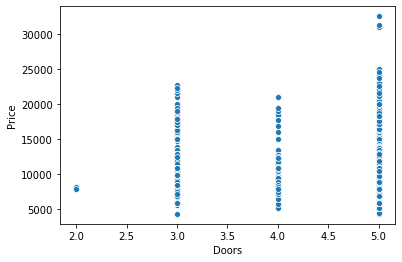

In [53]:
sns.scatterplot(data['Doors'], data['Price'])

In [54]:
# Real(Ordered, Numerical) data
real_var = ['Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']

# category data 
cat_var = ["Mfg_Year", "HP", "CC", "Fuel_Type", "Doors", 'Gears', "Met_Color", "Automatic", "Mfr_Guarantee",
           "BOVAG_Guarantee", "ABS", "Airbag_1", "Airbag_2", "Airco",
          "Automatic_airco", "Boardcomputer", "CD_Player", "Central_Lock",
          "Powered_Windows", "Power_Steering", "Radio", "Mistlamps",
          "Sport_Model", "Backseat_Divider", "Metallic_Rim", "Radio_cassette",
          "Parking_Assistant","Tow_Bar"]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


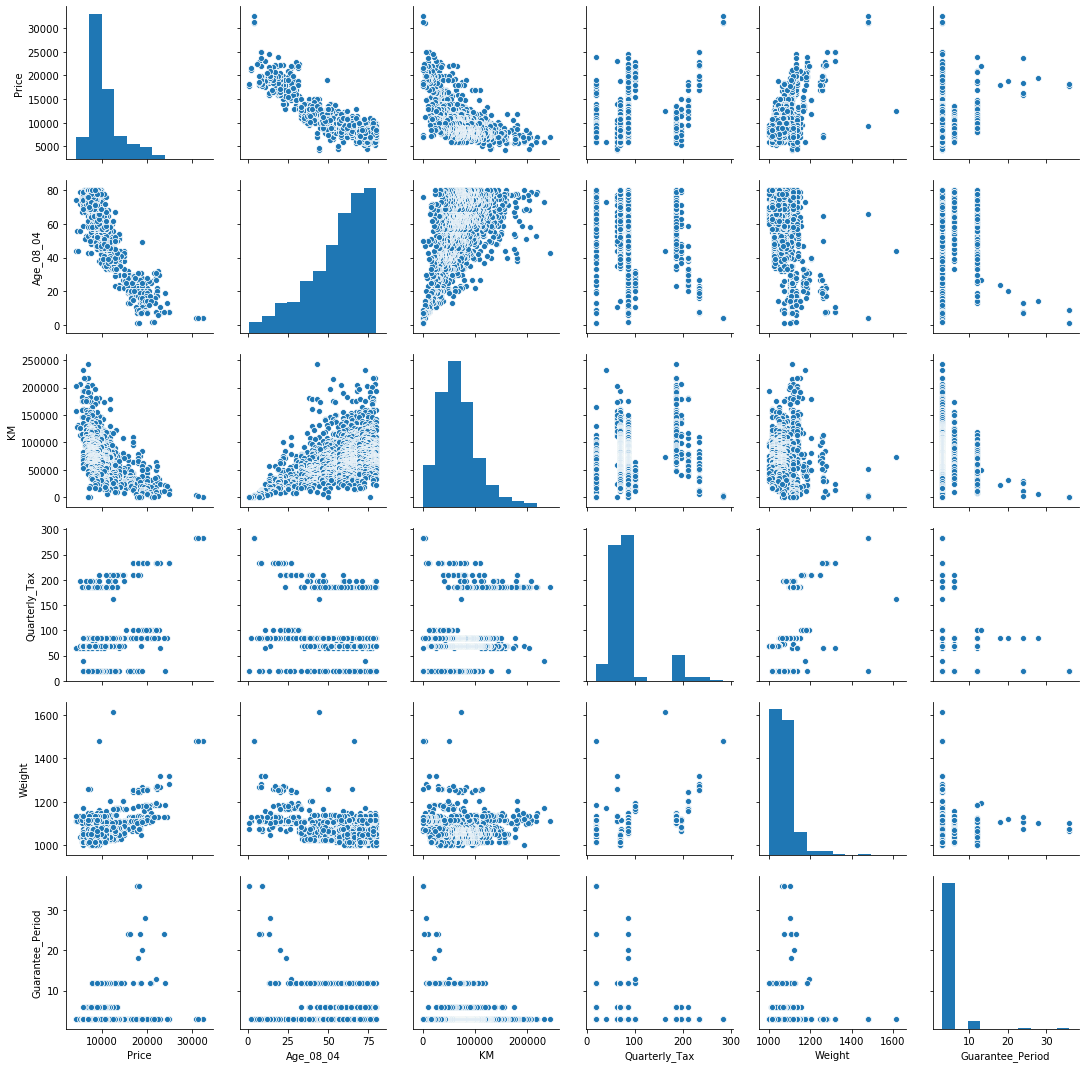

In [55]:
#As the dependent variable Price is also continuous numerical data, the relationship with other continuous variables 
#is checked and analyzed through pairplot
real_var_and_price = ['Price','Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']
sns.pairplot(data[real_var_and_price])

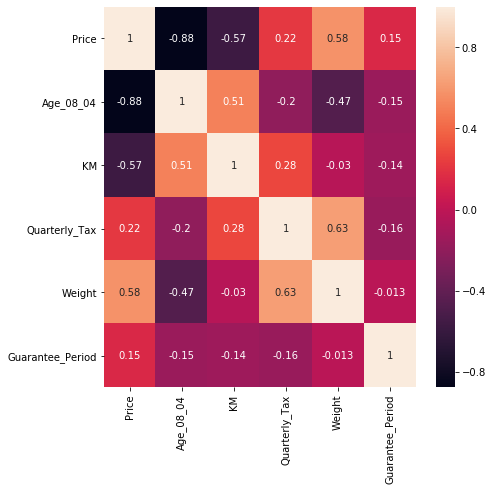

In [56]:
#Correlation coefficient of 0.5 or more, ** Age_08_04, KM, Weight were selected as relatively important variables
corr_table = pd.concat([data["Price"], data[real_var]], axis=1)
corr_mat = corr_table.corr()

# heatmap
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_mat, annot=True)

In [57]:
data.drop(["Quarterly_Tax", 'Guarantee_Period'], axis=1, inplace=True)

In [58]:
data.isna().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Automatic            0
cc                   0
Doors               12
Cylinders           38
Gears               18
Weight               5
Mfr_Guarantee        0
BOVAG_Guarantee      0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Tow_Bar              0
dtype: int64

In [59]:
data["Doors"].fillna(data["Doors"].median(), inplace = True)

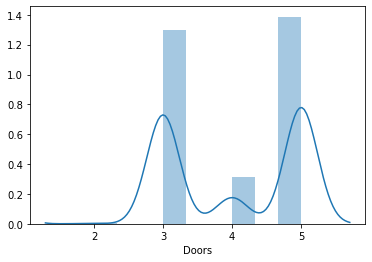

In [60]:
sns.distplot(data['Doors'])

In [61]:
new_doors = []
for item in data["Doors"]:
    if item == 2 or item == 4 :
        item = 0 #Sedan
        new_doors.append(item)
    else:
        item = 1 #Wagon
        new_doors.append(item)

new_doors_df = pd.DataFrame(new_doors)
data['New_Doors'] = new_doors_df

In [62]:
data.drop(["Doors"], axis=1, inplace=True)

### Treat missing values

In [63]:
data["Cylinders"].fillna(data["Cylinders"].median(), inplace = True)

In [64]:
data["Gears"].fillna(data["Gears"].median(), inplace = True)

In [65]:
data["Weight"].fillna(data["Weight"].mean(), inplace = True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 33 columns):
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null float64
Cylinders           1436 non-null float64
Gears               1436 non-null float64
Weight              1436 non-null float64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco               1436 non-null int64
Automatic_airco     1436 non-null int64
Boardcomputer       1436 non-null int64
CD_Player           1436 non-null int64
Cent

In [67]:
data = pd.get_dummies(data, drop_first=True)

# 3. Scaling the data

In [68]:
x = data.iloc[:,1:]
y = data['Price']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [71]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_sc, y_train)
pred = lm.predict(X_test_sc)

In [72]:
y_test

651      7950
411     10950
342     14950
1298     7500
483      9900
        ...  
1029    10450
520      9400
996      9950
333     11750
1069     7950
Name: Price, Length: 288, dtype: int64

In [73]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': (pred)})
df

,Actual,Predicted
651,7950,8756.190568
411,10950,10779.728471
342,14950,13592.941757
1298,7500,7877.381542
483,9900,10745.081537
...,...,...
1029,10450,11069.628326
520,9400,9733.807325
996,9950,10793.005307
333,11750,12349.903652


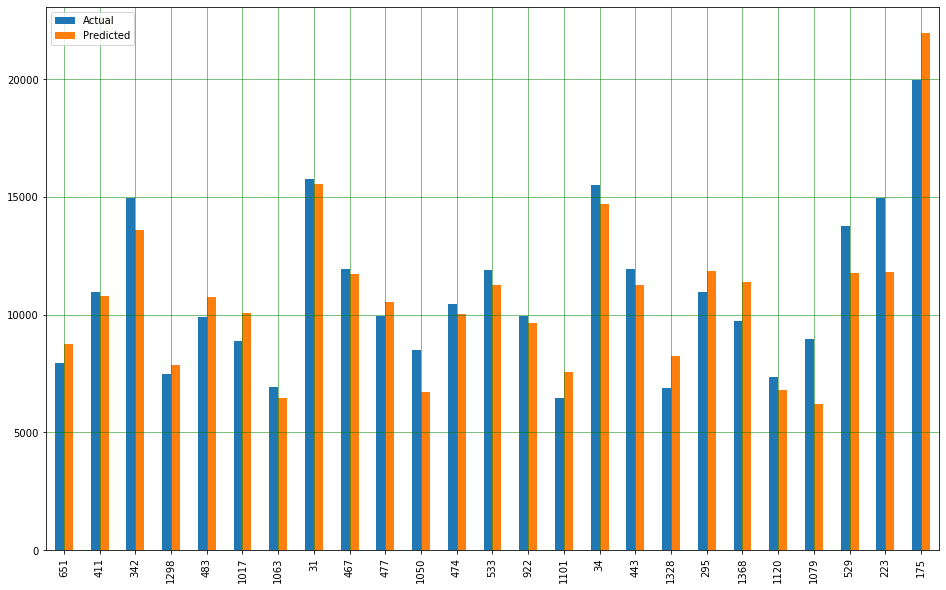

In [74]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [79]:
from sklearn.metrics import r2_score
lm.score(X_test_sc,y_test)

0.8509148429188937